## Problem Statement
The primary goal of this project is to develop a machine learning model that can accurately predict the likelihood of an individual developing diabetes based on a set of predictor variables. This model aims to assist healthcare providers in early diagnosis and intervention, ultimately improving patient outcomes and reducing healthcare costs.

### Importing required libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv ("Medical_diabetes_dataset.csv")
df.head ()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Pregnancies
0,Female,80.0,0,1,never,25.19,6.6,140,0,2
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,2
2,Male,28.0,0,0,never,27.32,5.7,158,0,8
3,Female,36.0,0,0,current,23.45,5.0,155,0,5
4,Male,76.0,1,1,current,20.14,4.8,155,0,2


In [3]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
 9   Pregnancies          100000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.6+ MB


### Univariate Analysis

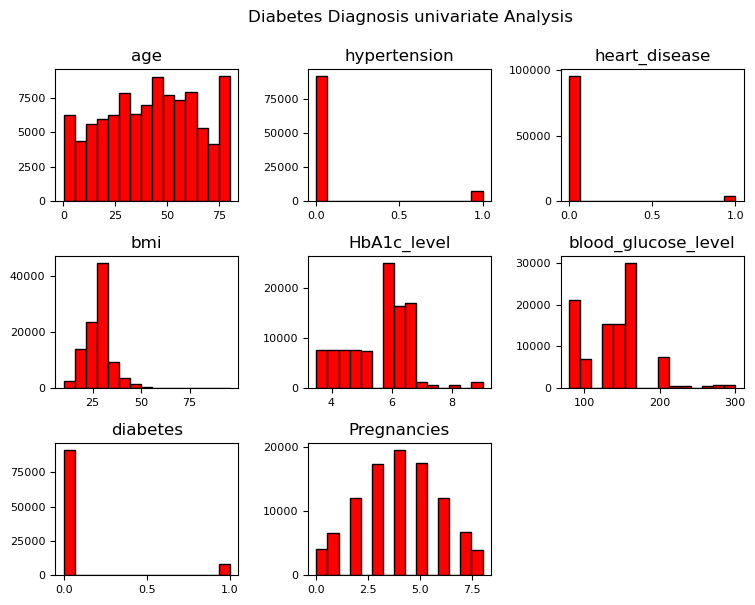

In [5]:
df.hist (bins = 15, color = "r", edgecolor = "black", xlabelsize = 8, ylabelsize = 8,
         linewidth = 1, grid = False)

plt.tight_layout (rect = (0, 0, 1.2, 1.2))
plt.suptitle ("Diabetes Diagnosis univariate Analysis", x = 0.65, y = 1.25)
plt.show ()

### Multivariate Analysis

In [6]:
corr = df.corr ()
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Pregnancies
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008,0.000150
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823,0.000358
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727,0.002138
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357,0.000047
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660,-0.003454
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558,0.003370
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000,0.002267
Pregnancies,0.000150,0.000358,0.002138,0.000047,-0.003454,0.003370,0.002267,1.000000


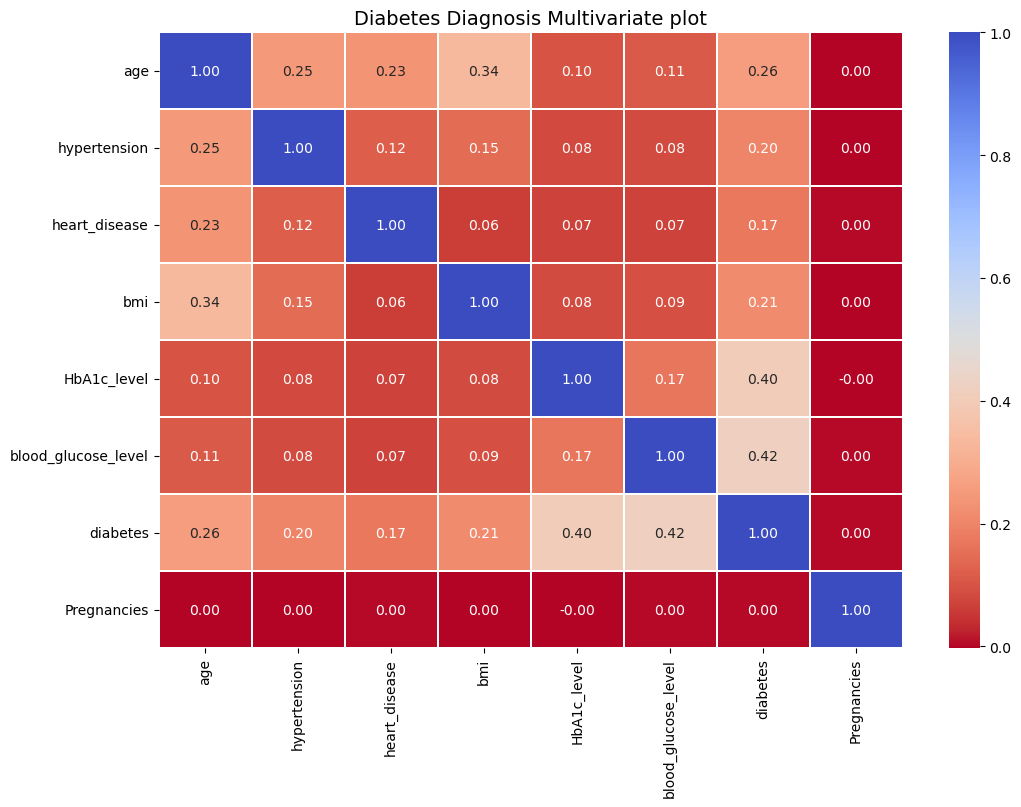

In [7]:
plt.figure (figsize = (12, 8))

sns.heatmap (corr, annot = True, fmt='.2f', cmap= "coolwarm_r", linewidth = 0.2)

plt.title ("Diabetes Diagnosis Multivariate plot", fontsize = 14)
plt.show ()

<AxesSubplot:xlabel='diabetes', ylabel='blood_glucose_level'>

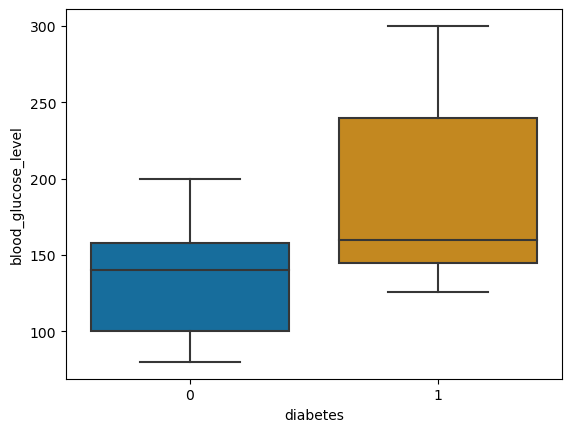

In [8]:
# comparing the blood_glucose_level and diabetes column
sns.boxplot (y = "blood_glucose_level", x = "diabetes", data = df, palette = "colorblind")

<AxesSubplot:xlabel='diabetes', ylabel='HbA1c_level'>

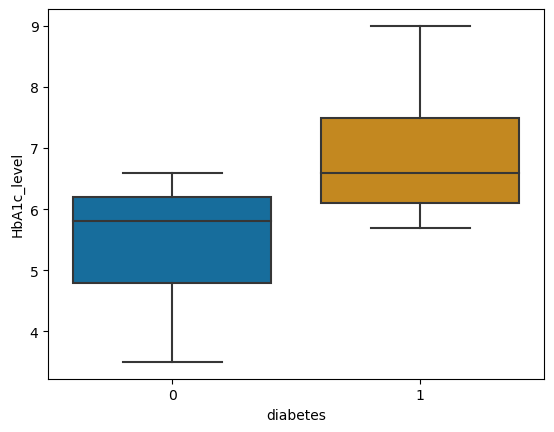

In [10]:
# Comparing the heamoglobin level and diabetes
sns.boxplot (y = "HbA1c_level", x = "diabetes", data = df, palette = "colorblind")

### Handling categorical Data

In [11]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
 9   Pregnancies          100000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.6+ MB


In [13]:
df = pd.get_dummies (df, columns = ["smoking_history", "gender"])
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Pregnancies,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,2,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,2,1,0,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,8,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,5,0,1,0,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,2,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,6,1,0,0,0,0,0,1,0,0
99996,2.0,0,0,17.37,6.5,100,0,5,1,0,0,0,0,0,1,0,0
99997,66.0,0,0,27.83,5.7,155,0,2,0,0,0,1,0,0,0,1,0
99998,24.0,0,0,35.42,4.0,100,0,6,0,0,0,0,1,0,1,0,0


In [14]:
del df["gender_Other"]

In [16]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Pregnancies,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male
0,80.0,0,1,25.19,6.6,140,0,2,0,0,0,0,1,0,1,0
1,54.0,0,0,27.32,6.6,80,0,2,1,0,0,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,8,0,0,0,0,1,0,0,1
3,36.0,0,0,23.45,5.0,155,0,5,0,1,0,0,0,0,1,0
4,76.0,1,1,20.14,4.8,155,0,2,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,6,1,0,0,0,0,0,1,0
99996,2.0,0,0,17.37,6.5,100,0,5,1,0,0,0,0,0,1,0
99997,66.0,0,0,27.83,5.7,155,0,2,0,0,0,1,0,0,0,1
99998,24.0,0,0,35.42,4.0,100,0,6,0,0,0,0,1,0,1,0


## Modeling 

In [17]:
x = df.drop ("diabetes", axis = 1)
y = df["diabetes"]


In [19]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, train_size = 0.80, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape

((80000, 15), (20000, 15))

### LogisticRegression 

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression ()

In [24]:
model.fit (x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = model.predict (x_test)

In [28]:
pd.DataFrame ({"Actual": y_pred[:30], "predictions": y_pred[:30]})

,Actual,predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [29]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score (y_test, y_pred)

0.94175